# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `4` | `Questions`

> "Hi Team! 👋

> The current notebook contains 10 questions that help you review our course content.

> Each question asks you to answer with specific results. Some questions are the `reverse-engineering-type` questions as I have asked in exercise problem set 3. Other questions require direct answers (because, given the nature of the question, reverse-engineering is not feasible).

> These questions won’t be difficult to solve—and answering them will strengthen your understanding of the learning materials. Importantly, the pathway to each answer has been given in lecture scripts, in-class lessons, answers to discussion board questions, and assigned readings. 

> First try to answer to the questions without setting any time constraints. Then, remove all your answers and try to answer again within a 90-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [174]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [175]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <font color = red> Question 1</font>. Please import historical stock data from the web on the following financial instruments, and create the following DataFrame that contains adjusted closing prices. 

### Here, the timeframe should be set between the 13th of October 2014 through the 13th of September 2022 (nine years of data).

- `WMT` Stock of Walmart
- `IBM` Stock of IBM

In [176]:
import datetime

In [177]:
start_date = datetime.date(2014, 10, 13)
end_date = datetime.date(2022, 9, 14)

tickers = ["WMT", "IBM"]
data = yf.download(tickers, start_date, end_date)
data = data["Adj Close"]

[*********************100%%**********************]  2 of 2 completed


In [178]:
scale_WMT = 65.120033 / 21.094608
scale_IBM = 124.599342 / 114.104828
print(scale_WMT)
print(scale_IBM)

data["WMT"] = data["WMT"] * scale_WMT
data["IBM"] = data["IBM"] * scale_IBM
data

3.087046367488792
1.0919725675411385


Ticker,IBM,WMT
Date,,
2014-10-13,124.599342,65.120034
2014-10-14,124.789507,65.472688
2014-10-15,123.397682,63.138556
2014-10-16,122.100898,61.979901
2014-10-17,123.601352,62.215011
...,...,...
2022-09-07,127.710062,135.740059
2022-09-08,128.470074,136.430047
2022-09-09,129.190080,136.840069


### <font color = red> Question 2</font>. Please run a simple moving average crossover strategy for `IBM`.

### The two moving windows are 20 and 60 days.

### Please show your positions with a plot.

In [179]:
# short_term simple moving average = 20 days

data["SMA_20"] =\
(
    data
    ["IBM"]
    .rolling(window = 20)
    .mean()
)

# long_term simple moving average = 60 days
data["SMA_60"] =\
(
    data
    ["IBM"]
    .rolling(window = 60)
    .mean()
)

In [180]:
data["positions"] =\
(
     np
     .where(data["SMA_20"] > data["SMA_60"],
            1, -1)
)

data

Ticker,IBM,WMT,SMA_20,SMA_60,positions
Date,,,,,
2014-10-13,124.599342,65.120034,NaN,NaN,-1
2014-10-14,124.789507,65.472688,NaN,NaN,-1
2014-10-15,123.397682,63.138556,NaN,NaN,-1
2014-10-16,122.100898,61.979901,NaN,NaN,-1
2014-10-17,123.601352,62.215011,NaN,NaN,-1
...,...,...,...,...,...
2022-09-07,127.710062,135.740059,132.643572,133.397454,-1
2022-09-08,128.470074,136.430047,132.492072,133.314806,-1
2022-09-09,129.190080,136.840069,132.324574,133.234117,-1


In [181]:
new_data = data.dropna()
new_data

Ticker,IBM,WMT,SMA_20,SMA_60,positions
Date,,,,,
2015-01-07,105.990429,74.804896,108.487907,111.236425,-1
2015-01-08,108.294150,76.383754,108.331710,110.964672,-1
2015-01-09,108.765756,75.438135,108.283857,110.697609,-1
2015-01-12,106.940615,76.003814,108.125607,110.423325,-1
2015-01-13,107.193505,75.404367,108.174482,110.174868,-1
...,...,...,...,...,...
2022-09-07,127.710062,135.740059,132.643572,133.397454,-1
2022-09-08,128.470074,136.430047,132.492072,133.314806,-1
2022-09-09,129.190080,136.840069,132.324574,133.234117,-1


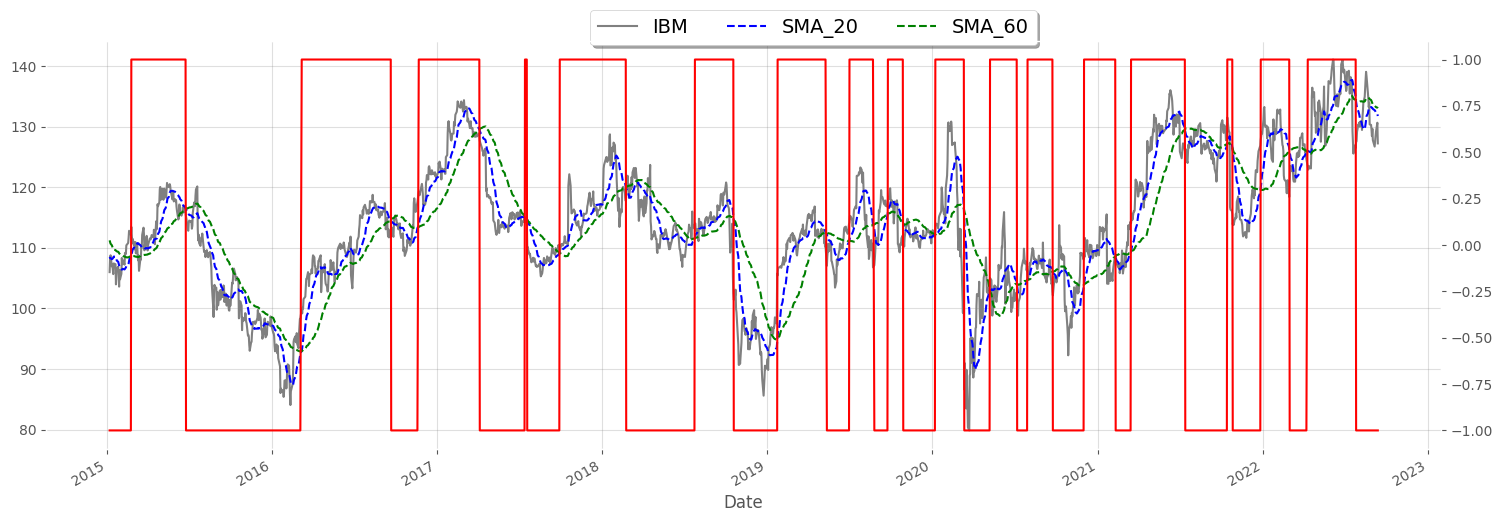

In [182]:

ax =\
(
    new_data
    [["IBM", 
      "SMA_20", 
      "SMA_60", 
      "positions"]]
    .plot(secondary_y = "positions",
          style = ["grey",
                   "b--",
                   "g--",
                   "red"],
          figsize = [18, 6]
         )
)

(
    ax
    .legend(loc = "upper center",
            shadow = True,
            ncol = 4,
            bbox_to_anchor = (0.55, 1.10),
            fancybox = True)
)

### <font color = red> Question 3</font>. Based on your lines of codes that lead to answer 2 above, compare the returns to see if the strategy leads to a win over the passive benchmark investment.

In [183]:
new_data["RETURNS"] =\
 (
     np
     .log(data["IBM"] / data["IBM"].shift(1)
         )
 )

new_data

Ticker,IBM,WMT,SMA_20,SMA_60,positions,RETURNS
Date,,,,,,
2015-01-07,105.990429,74.804896,108.487907,111.236425,-1,-0.006557
2015-01-08,108.294150,76.383754,108.331710,110.964672,-1,0.021502
2015-01-09,108.765756,75.438135,108.283857,110.697609,-1,0.004345
2015-01-12,106.940615,76.003814,108.125607,110.423325,-1,-0.016923
2015-01-13,107.193505,75.404367,108.174482,110.174868,-1,0.002362
...,...,...,...,...,...,...
2022-09-07,127.710062,135.740059,132.643572,133.397454,-1,0.007782
2022-09-08,128.470074,136.430047,132.492072,133.314806,-1,0.005933
2022-09-09,129.190080,136.840069,132.324574,133.234117,-1,0.005589


In [184]:
new_data["STRATEGY"] =\
(
    new_data["positions"]
    .shift(1) 
    * 
    new_data["RETURNS"]
)

new_data["STRATEGY"]

Date
2015-01-07         NaN
2015-01-08   -0.021502
2015-01-09   -0.004345
2015-01-12    0.016923
2015-01-13   -0.002362
                ...   
2022-09-07   -0.007782
2022-09-08   -0.005933
2022-09-09   -0.005589
2022-09-12   -0.011314
2022-09-13    0.026445
Name: STRATEGY, Length: 1935, dtype: float64

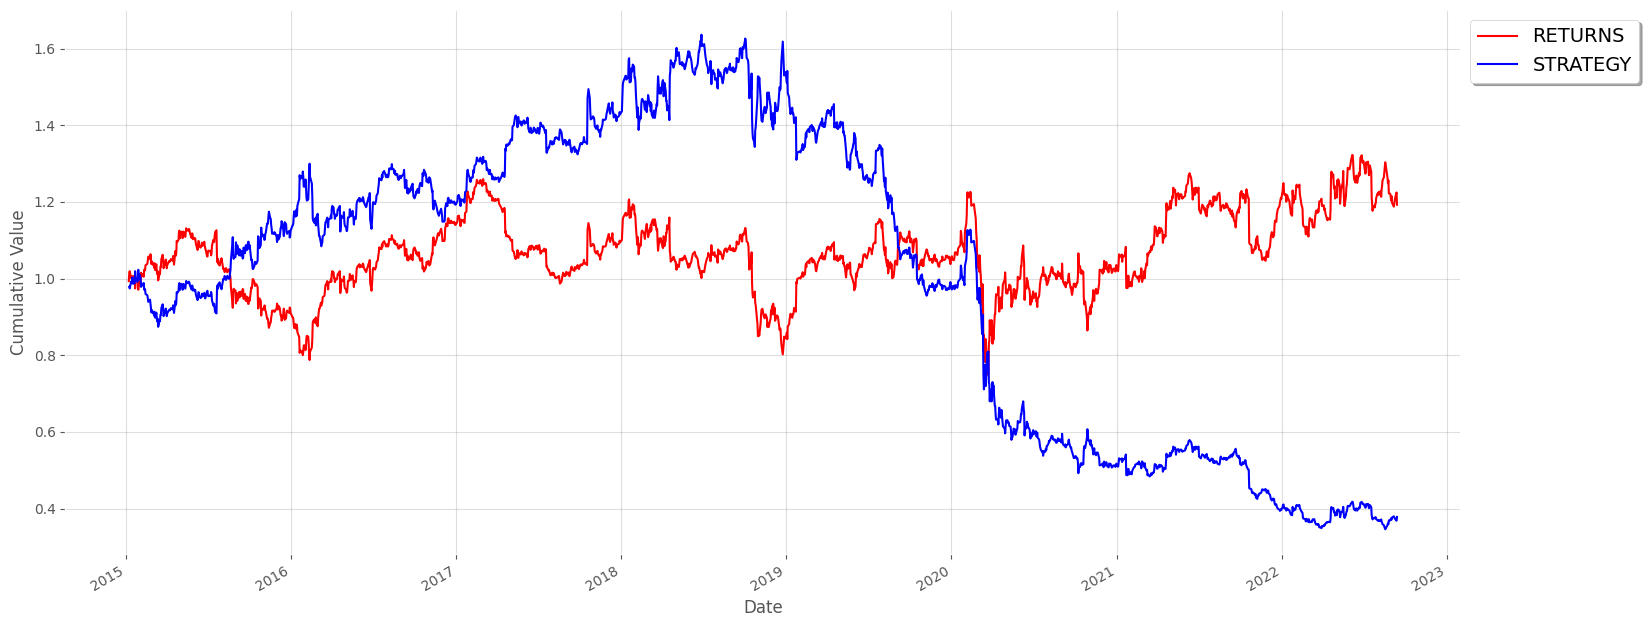

In [185]:
cumulative_data =\
    new_data\
    [["RETURNS", "STRATEGY"]]\
    .cumsum()\
    .apply(np.exp)

ax =\
    cumulative_data\
    .plot(figsize=[18, 8],
          color=["red", "blue"],
          linewidth=1.5)

ax\
.legend(["RETURNS", "STRATEGY"],
        loc="upper left", 
        bbox_to_anchor=(1, 1), 
        shadow=True)


plt.ylabel("Cumulative Value")
plt.xlabel("Date")

plt.show()

### <font color = red> Question 4</font>. Based on your lines of codes that lead to answer 3 above, please calculate the maximum drawdown and the longest drawdown period.

In [186]:
new_data["CUMULATVE_RETURNS"] =\
(
    new_data["STRATEGY"]
    .cumsum()
    .apply(np.exp)
)

new_data

Ticker,IBM,WMT,SMA_20,SMA_60,positions,RETURNS,STRATEGY,CUMULATVE_RETURNS
Date,,,,,,,,
2015-01-07,105.990429,74.804896,108.487907,111.236425,-1,-0.006557,NaN,NaN
2015-01-08,108.294150,76.383754,108.331710,110.964672,-1,0.021502,-0.021502,0.978727
2015-01-09,108.765756,75.438135,108.283857,110.697609,-1,0.004345,-0.004345,0.974483
2015-01-12,106.940615,76.003814,108.125607,110.423325,-1,-0.016923,0.016923,0.991115
2015-01-13,107.193505,75.404367,108.174482,110.174868,-1,0.002362,-0.002362,0.988777
...,...,...,...,...,...,...,...,...
2022-09-07,127.710062,135.740059,132.643572,133.397454,-1,0.007782,-0.007782,0.376971
2022-09-08,128.470074,136.430047,132.492072,133.314806,-1,0.005933,-0.005933,0.374741
2022-09-09,129.190080,136.840069,132.324574,133.234117,-1,0.005589,-0.005589,0.372652


In [187]:
new_data["MAX_GROSS_PERFORMANCE"] =\
(
    new_data
    ["CUMULATVE_RETURNS"]
    .cummax()
)

new_data

Ticker,IBM,WMT,SMA_20,SMA_60,positions,RETURNS,STRATEGY,CUMULATVE_RETURNS,MAX_GROSS_PERFORMANCE
Date,,,,,,,,,
2015-01-07,105.990429,74.804896,108.487907,111.236425,-1,-0.006557,NaN,NaN,NaN
2015-01-08,108.294150,76.383754,108.331710,110.964672,-1,0.021502,-0.021502,0.978727,0.978727
2015-01-09,108.765756,75.438135,108.283857,110.697609,-1,0.004345,-0.004345,0.974483,0.978727
2015-01-12,106.940615,76.003814,108.125607,110.423325,-1,-0.016923,0.016923,0.991115,0.991115
2015-01-13,107.193505,75.404367,108.174482,110.174868,-1,0.002362,-0.002362,0.988777,0.991115
...,...,...,...,...,...,...,...,...,...
2022-09-07,127.710062,135.740059,132.643572,133.397454,-1,0.007782,-0.007782,0.376971,1.636359
2022-09-08,128.470074,136.430047,132.492072,133.314806,-1,0.005933,-0.005933,0.374741,1.636359
2022-09-09,129.190080,136.840069,132.324574,133.234117,-1,0.005589,-0.005589,0.372652,1.636359


<Axes: xlabel='Date'>

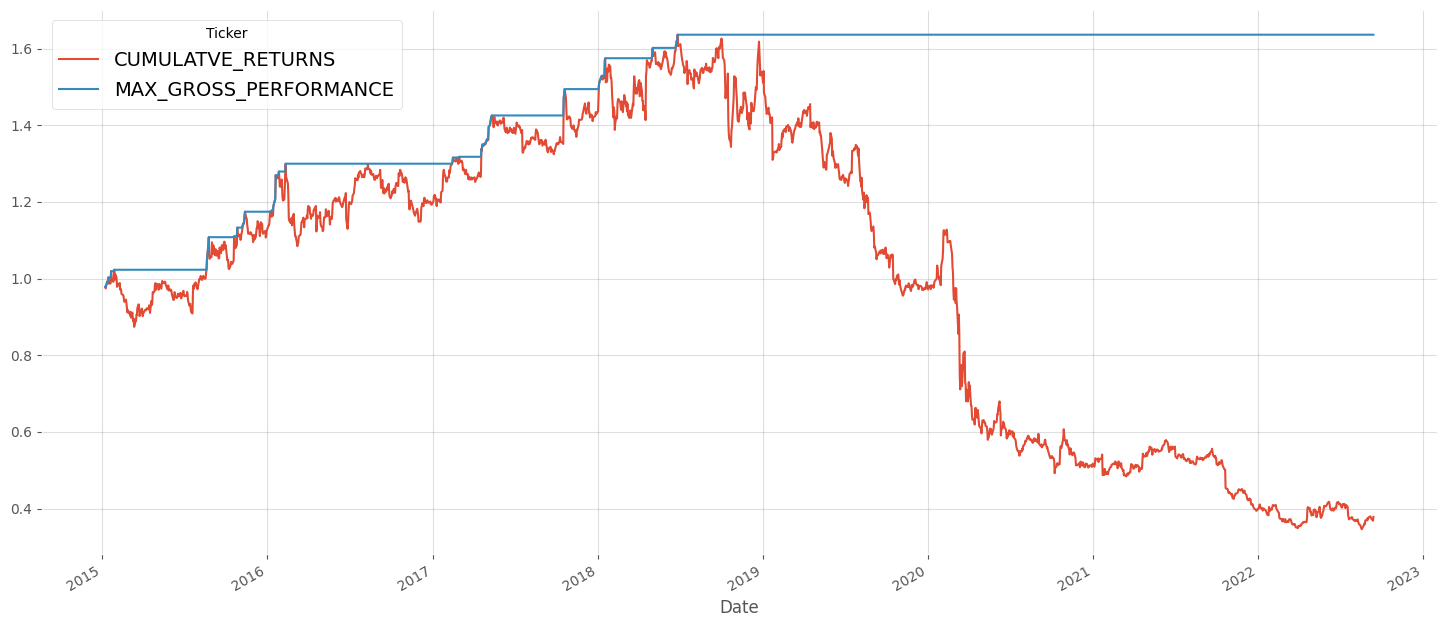

In [188]:
(
    new_data
    [["CUMULATVE_RETURNS", "MAX_GROSS_PERFORMANCE"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

In [189]:
drawdown = new_data["MAX_GROSS_PERFORMANCE"] - new_data["CUMULATVE_RETURNS"]

drawdown.max()

np.float64(1.290181179683421)

In [190]:
periods =\
(
    drawdown[drawdown == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown[drawdown == 0].index[   : -1].to_pydatetime()
)

In [191]:
periods.max()

datetime.timedelta(days=369)

### Please make sure to answer below.

    The maximum drawdown is about _____129______ percentage points.
    The longest drawdown period lasts for ______369_____ days.

### <font color = red> Question 5</font>. Now let’s have a look at the stock price of Walmart (WMT). Please create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 4 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

In [192]:
walmart = data[["WMT"]]
walmart

Ticker,WMT
Date,
2014-10-13,65.120034
2014-10-14,65.472688
2014-10-15,63.138556
2014-10-16,61.979901
2014-10-17,62.215011
...,...
2022-09-07,135.740059
2022-09-08,136.430047
2022-09-09,136.840069


In [199]:
walmart["RETURNS"] =\
(np
    .log(walmart["WMT"] 
         /
         walmart["WMT"]
         .shift(1)
        )
)

In [200]:
walmart["SMA_41"] =\
(
    walmart["WMT"]
    .rolling(window = 41)
    .mean()
)

In [201]:
threshold = 4
walmart["distance"] = walmart["WMT"] - walmart["SMA_41"]

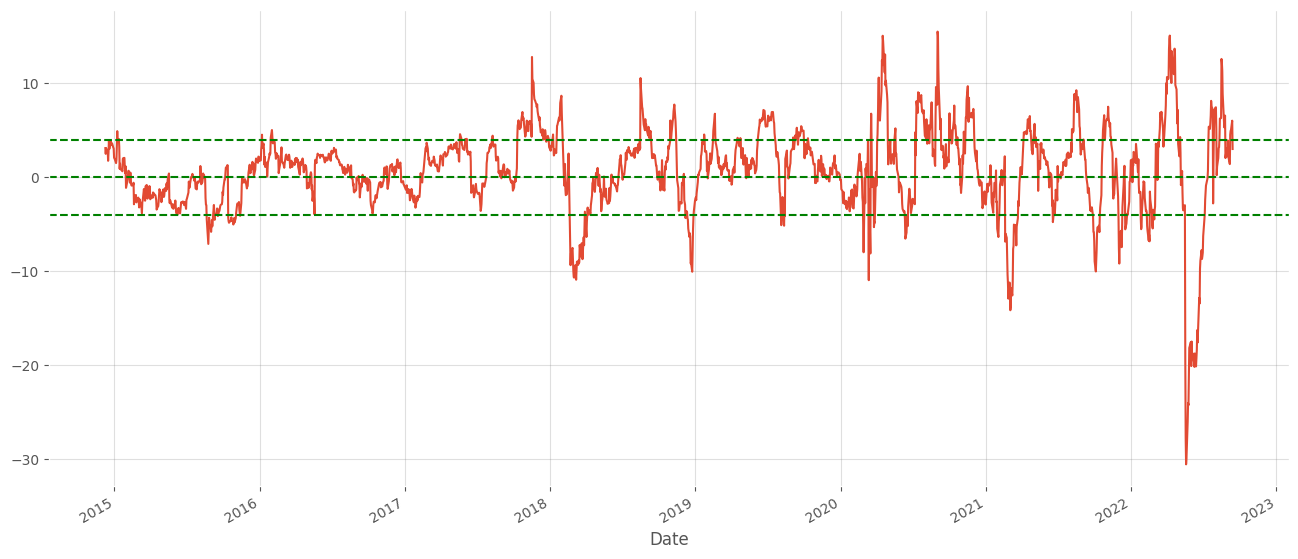

In [202]:
(
    walmart["distance"]
    .dropna()
    .plot(figsize = [16, 7],
         )
)

plt.yticks([10, 0, -10, -20, -30])

plt.axhline(threshold, color = "green", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "green", ls = "--")


### <font color = red> Question 6</font> Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

In [203]:
walmart["distance"] = walmart["WMT"] - walmart["SMA_41"]
walmart["distance"]

Date
2014-10-13         NaN
2014-10-14         NaN
2014-10-15         NaN
2014-10-16         NaN
2014-10-17         NaN
                ...   
2022-09-07    4.551276
2022-09-08    4.950963
2022-09-09    5.067968
2022-09-12    6.034433
2022-09-13    3.020766
Name: distance, Length: 1994, dtype: float64

<Axes: xlabel='Date'>

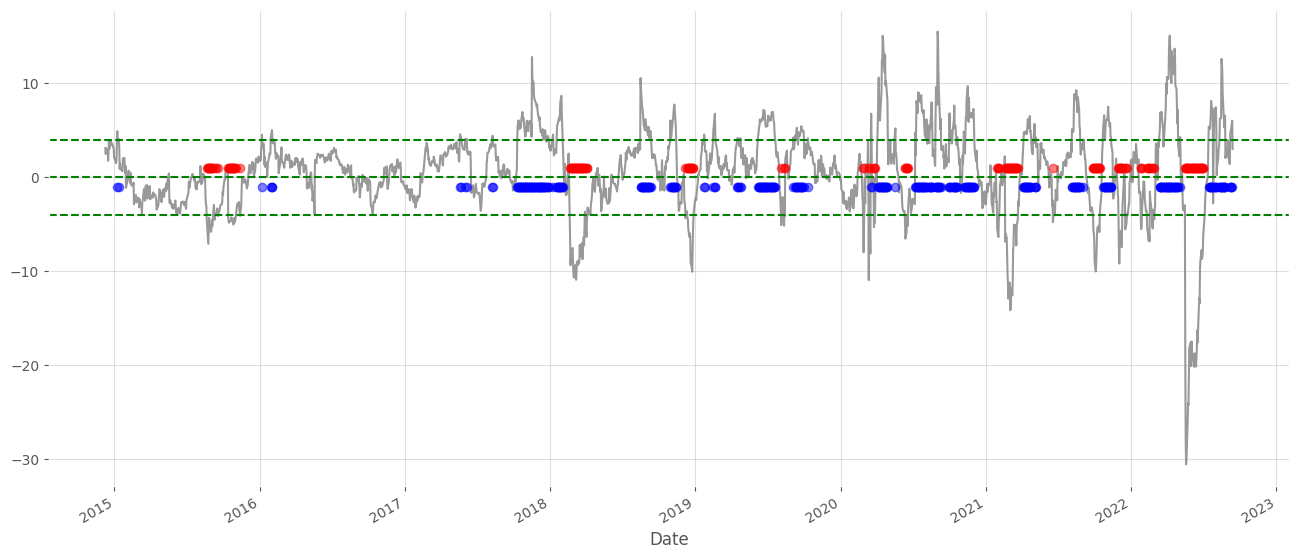

In [205]:
(
    walmart
    ["distance"]
    .dropna()
    .plot(figsize = [16, 7],
          color = "grey",
          alpha = 0.80)
)

# Upper-bound threshold

(plt
    .axhline(4,
             color = "green",
             ls = "--")
)

# middler-bound threshold

(plt
    .axhline(0,
             color = "green",
             ls = "--")
)
# Lower-bound threshold

(plt
    .axhline(-4,
             color = "green",
             ls = "--")
)

# Sell Signal

walmart["sell"] =\
(
    np
    .where(walmart["distance"] > 4,
           -1, np.nan)
)

(
    walmart["sell"]
    .dropna()
    .plot(figsize = [16 , 7],
          color = "blue",
          style = "o",
          alpha = 0.50)
)
# Buy Signal

walmart["buy"] =\
(
    np
    .where(walmart["distance"] < -4,
           1, np.nan)
)

(
    walmart["buy"]
    .dropna()
    .plot(figsize = [16 , 7],
          color = "red",
          style = "o",
          alpha = 0.50)
)

### Then, please come up with an answer for the question below.

    Based on mean-reversion strategy, there were _______ trading opportunities found.

### <font color = red> Question 7</font> Please draw the strategy returns as shown below.

In [217]:
walmart["trading_positions"] =\
(
    np
    .where(walmart["distance"] > threshold, # overbought --> sell (short)
           -1, np.nan)
)

walmart["trading_positions"] =\
(
    np
    .where(walmart["distance"] < -threshold, # oversold --> buy (long)
           1, walmart["trading_positions"]
          )
)

walmart["trading_positions"] =\
(
    np
    #           +                            - 
    #           -                            +
    .where(walmart["distance"] * walmart["distance"].shift(1) < 0, # oversold --> buy (long)
           0, walmart["trading_positions"]
          )
)

In [218]:
walmart["STRATEGY"] =\
    (
    walmart
    ["trading_positions"]
    .shift(1)
    *
    walmart["RETURNS"]
    )

<Axes: xlabel='Date'>

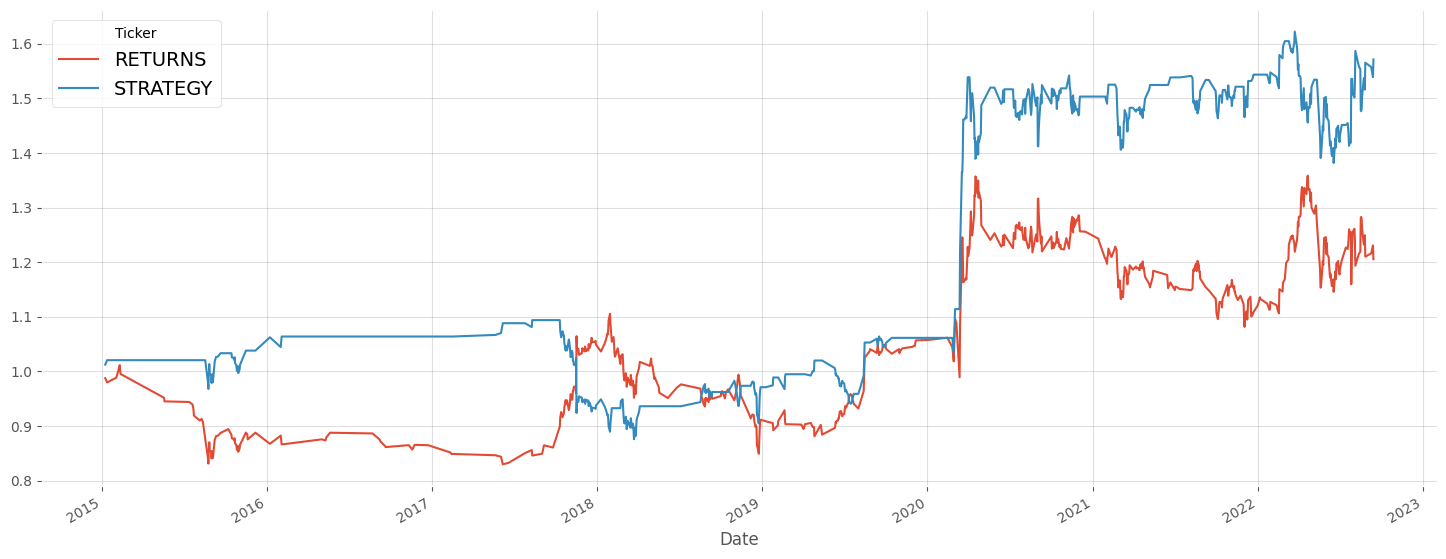

In [219]:
(
    walmart
    [["RETURNS", "STRATEGY"]]
    .dropna()
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [18, 7]
         )
)

### <font color = red> Question 8</font>. Please calculate the Sharpe Ratio of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a Sharpe ratio of _________ . 

    Mean reversion strategy for WMT leads to a Sharpe ratio of _________ .

### <font color = red> Question 9</font>. Please calculate the Compound Annual Growth Rate (CAGR) of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a CAGR of _________ . 

    Mean reversion strategy for WMT leads to a CAGR of _________ .


### <font color = red> Question 10</font>. This question is based on the following scenario. After reading it, please respond to the associated sub-questions.

> Scenario: You've been appointed as a Quantitative Researcher in the process-driven investing division of a leading hedge fund. As part of your onboarding challenge, you are handed data (`alphas.csv`) for three experimental trading models, codenamed Alphas A, B, and C. These models, each initiated with a capital of 100K, demonstrate nearly identical Sharpe ratios across a span of 1120 trading days. Intrigued by this uniformity yet aware of the Sharpe ratio's shortcomings, you embark on a journey to dissect the Alphas' performance through a multifaceted quantitative lens.

> 10-1. Sharpe Ratio Diagnostics:

- Given the daily return series for Alphas A, B, and C:

- Derive the annualized Sharpe ratio for each Alpha, with the industry-standard assumption of 252 trading days per annum. In light of these findings, how might you reconsider the perceived risk-adjusted returns of these models?

> 10-2. Trajectory of Cumulative Returns:
    
- Visualize and compare the cumulative returns of each Alpha.

    10-3. Cumulative Returns Over a 1120-Day Horizon:
- Extrapolate the cumulative returns for each Alpha over this period. When evaluating based on the Compound Annual Growth Rate (CAGR), how do these Alphas stack up against one another?

> 10.4 Delving into Maximum Drawdown (MDD):
- Assess the Maximum Drawdown (MDD) for each model within this time frame. Based on this assessment, which Alpha appears best equipped to withstand market downturns?

> 10.5 Examining Drawdown Duration:
- Analyze the longest drawdown durations for each strategy. Which of the Alphas seems to have the quickest recovery mechanism following a significant drawdown?

> 10.6 Comprehensive Assessment of Strategy Performance:
- By synthesizing data from metrics such as the Sharpe ratio, cumulative returns trajectory, MDD, and drawdown duration, provide a well-rounded analysis of the three Alphas. Rank and justify your recommendations based on your quantitative insights.

> 10.7 Reflecting on the Sharpe Ratio:
- Given the observed disparities in cumulative returns and MDD among the Alphas, even with similar Sharpe ratios, evaluate the effectiveness of relying solely on the Sharpe ratio. Can you propose additional or refined metrics to differentiate between Alphas with matching Sharpe values but varying performances in other critical areas?

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>